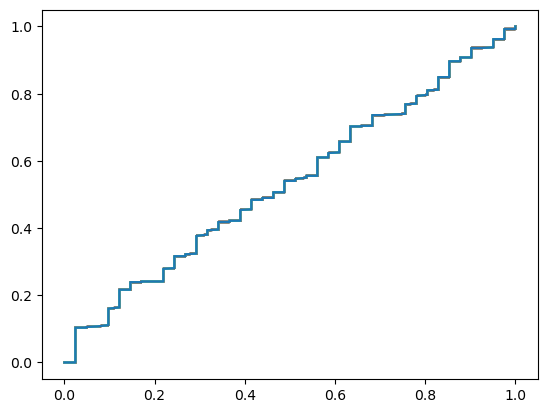

In [19]:
from matplotlib.pyplot import plot
import numpy as np



#plots the ROC curve off given data prediction.
#IMPORTANT: the predicted p-value has to be a column in the "pred" dataset. Its col name is passed to "alphaColName"(labes has to be there to)



def ROC(pred, alphaColName, steps):

    X = []
    Y = []


    for alpha in np.arange(0, 1, steps):
        x,y = ROCHelper(pred, alphaColName, alpha)
        X.append(x)
        Y.append(y)
    plot(X,Y)




#retruns true pos rate and false neg rate for one alpha

def ROCHelper(pred, alphaColName, alpha):

    predTrue = pred.loc[pred[alphaColName] >= alpha]
    predFalse = pred.loc[pred[alphaColName] <= alpha]

    TP = predTrue.loc[predTrue["label"]==1].count()
    FP = predTrue.loc[predTrue["label"]==0].count()
    TN = predFalse.loc[predFalse["label"]==0].count()
    FN = predFalse.loc[predFalse["label"]==1].count()


    FPR = FP / (FP + TN)

    TPR = TP / (TP + FN)

    return TPR,FPR


import pandas as pd
import random

pred =  pd.read_csv("../HackathonMicrobiomeData/CAD/ClassCAD_train.csv")

alphaCol = []

for i in range(0,pred.shape[0]):
    alphaCol.append(random.uniform(0, 1))

pred["bumpo"] = alphaCol
ROC(pred, "bumpo", 0.001)


